# **1. Perkenalan Dataset**


Nama Dataset: Air Quality Dataset 2013-2017

Sumber : https://github.com/marceloreis/HTI/tree/c8688fc517972e373d7c1df3a8d82b2a2468131f/PRSA_Data_20130301-20170228

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# Libray untuk Clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
aotizhongxin = pd.read_csv('/content/drive/MyDrive/Dataset/Air Quality Dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
changping = pd.read_csv('/content/drive/MyDrive/Dataset/Air Quality Dataset/PRSA_Data_Changping_20130301-20170228.csv')
dingling = pd.read_csv('/content/drive/MyDrive/Dataset/Air Quality Dataset/PRSA_Data_Dingling_20130301-20170228.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Fitur yang digunakan:

a. PM2.5, PM10, SO2, NO2, CO, O3 (Fitur utama kualitas udara)

b. TEMP, PRES, DEWP, RAIN, WSPM, wd (Faktor lingkungan)

c. year, month, day, hour (Polusi bisa memiliki pola musiman/harian)

d. Station (Zona dengan risiko polusi tertinggi)
*italicized text*
e. wd (Digunakan setelah melalui proses encoding)

### Aotizhongxin

In [ ]:
# Melihat Struktur Dataframe
aotizhongxin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
# Menampilkan Missing Value dari setiap kolom
print("Jumlah missing values:", aotizhongxin.isnull().sum().sum())
aotizhongxin.isnull().sum()

Jumlah missing values: 7271


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


In [ ]:
# Mengecek Duplicated Data
aotizhongxin.duplicated().sum()

np.int64(0)

In [ ]:
# Menampilkan Beberapa value dari Dataframe
aotizhongxin.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Changping

In [ ]:
# Melihat Struktur Dataframe
changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
# Menampilkan Missing Value dari setiap kolom
print("Jumlah missing values:", changping.isnull().sum().sum())
changping.isnull().sum()

Jumlah missing values: 5166


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


In [ ]:
# Menampilkan Duplicated Data
changping.duplicated().sum()

np.int64(0)

In [ ]:
# Menampilkan Isi dari Dataframe
changping.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


### Dingling

In [ ]:
# Menampilkan Struktur Dataframe
dingling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
# Menampilkan Missing Value dari setiap kolom
print("Jumlah missing values:", dingling.isnull().sum().sum())
dingling.isnull().sum()

Jumlah missing values: 7015


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,779
PM10,656
SO2,730
NO2,1234
CO,2012


In [ ]:
# Menampilkan Duplicated Data
dingling.duplicated().sum()

np.int64(0)

In [ ]:
# Menampilkan value dari Dataframe
dingling.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


# Penggabungan Data

In [ ]:
# Penggabungan Ketiga Dataframe
kota = pd.concat([aotizhongxin, changping, dingling]).reset_index(drop=True)
print(kota["station"].value_counts())

station
Aotizhongxin    35064
Changping       35064
Dingling        35064
Name: count, dtype: int64


In [ ]:
# Menggabungkan Kolom Year, Month, Day, dan Hour mejadi kolom Date
kota['datetime'] = pd.to_datetime(kota[['year', 'month', 'day', 'hour']])

kota['hour_of_day'] = kota['datetime'].dt.hour
kota['day_of_week'] = kota['datetime'].dt.dayofweek  # 0 = Senin
kota['month'] = kota['datetime'].dt.month
kota['year'] = kota['datetime'].dt.year

kota.drop(columns=['day', 'hour'], inplace=True)

In [ ]:
#mengelompokkan kolom berdasarkan data type
dtype = kota.dtypes

column_by_dtype = {}
for column, dtype in dtype.items():
    if dtype == 'object':
        column_by_dtype['object'] = column_by_dtype.get('object', []) + [column]
    else:
        column_by_dtype['numeric'] = column_by_dtype.get('numeric', []) + [column]

print('Kolom kategorikal : ', column_by_dtype['object'])
print('Kolom numerikal : ', column_by_dtype['numeric'])

Kolom kategorikal :  ['wd', 'station']
Kolom numerikal :  ['No', 'year', 'month', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'datetime', 'hour_of_day', 'day_of_week']


In [ ]:
# Melihat tingkat konsentrasi polutan tertinggi
polutan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
kota[polutan].mean().sort_values(ascending=False)

,0
CO,1107.307420
PM10,96.143238
PM2.5,73.274027
O3,60.952020
NO2,43.726067
SO2,14.689739


/tmp/ipython-input-23-2854359617.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rata_rata_polutan.index, y=rata_rata_polutan.values, palette='Set2')


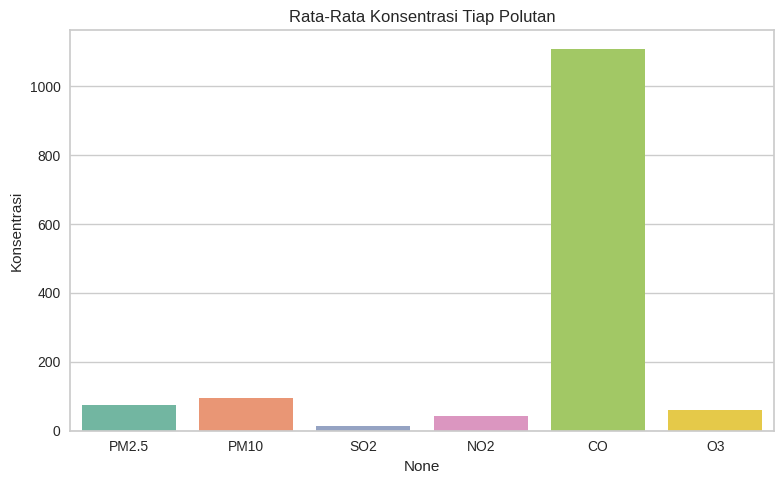

In [ ]:
# Hitung rata-rata tiap polutan → hasilnya Series
rata_rata_polutan = kota[polutan].mean()

# Buat barplot langsung dari Series
plt.figure(figsize=(8, 5))
sns.barplot(x=rata_rata_polutan.index, y=rata_rata_polutan.values, palette='Set2')
plt.title('Rata-Rata Konsentrasi Tiap Polutan')
plt.ylabel('Konsentrasi')
plt.tight_layout()
plt.show()

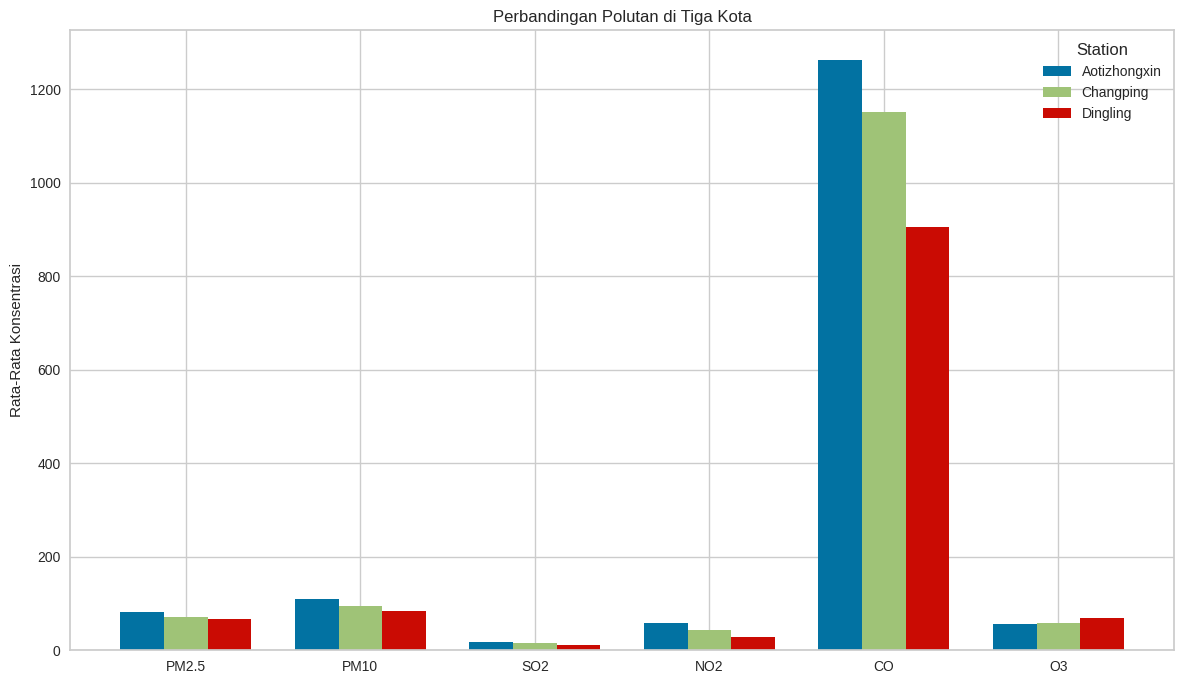

In [ ]:
from matplotlib.ticker import FuncFormatter

# Calculate the mean of each pollutant for each station
rata_kota = kota.groupby('station')[polutan].mean()

# Get the pollutant names and station names
polutan_names = rata_kota.columns.tolist()
station_names = rata_kota.index.tolist()

# Prepare positions for the bars
x = np.arange(len(polutan_names))  # positions for each pollutant
bar_width = 0.25

plt.figure(figsize=(12, 7))

# Plot bars for each station
for i, station_name in enumerate(station_names):
    plt.bar(x + i * bar_width, rata_kota.loc[station_name], width=bar_width, label=station_name)

# Labels and layout
plt.xticks(x + bar_width, polutan_names)
plt.ylabel('Rata-Rata Konsentrasi')
plt.title('Perbandingan Polutan di Tiga Kota')
plt.legend(title='Station')
plt.tight_layout()
plt.show()

Tren Per Jam

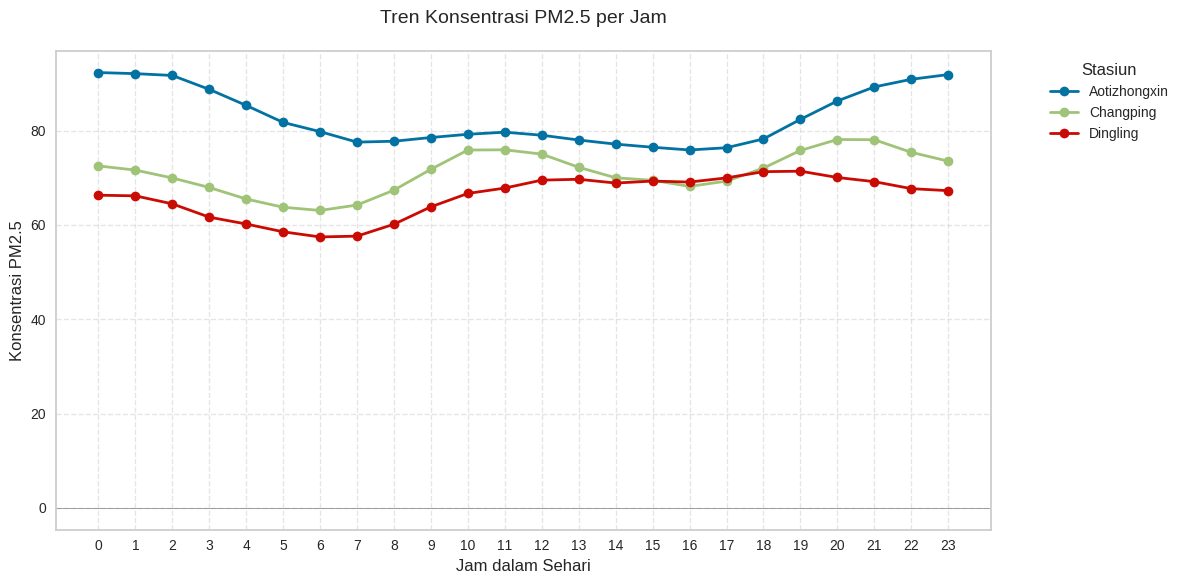

In [ ]:
# Tren Penyebaran PM2.5 Per Jam
polutan_pilihan = 'PM2.5'

# Hitung rata-rata per jam untuk setiap stasiun
hourly_means = kota.groupby(['station', 'hour_of_day'])[polutan_pilihan].mean().unstack(level=0)

plt.figure(figsize=(12, 6))

# Plot untuk setiap stasiun
for station in hourly_means.columns:
    plt.plot(hourly_means.index,
             hourly_means[station],
             marker='o',
             linestyle='-',
             linewidth=2,
             label=station)


plt.title(f'Tren Konsentrasi {polutan_pilihan} per Jam', fontsize=14, pad=20)
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel(f'Konsentrasi {polutan_pilihan}', fontsize=12)
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

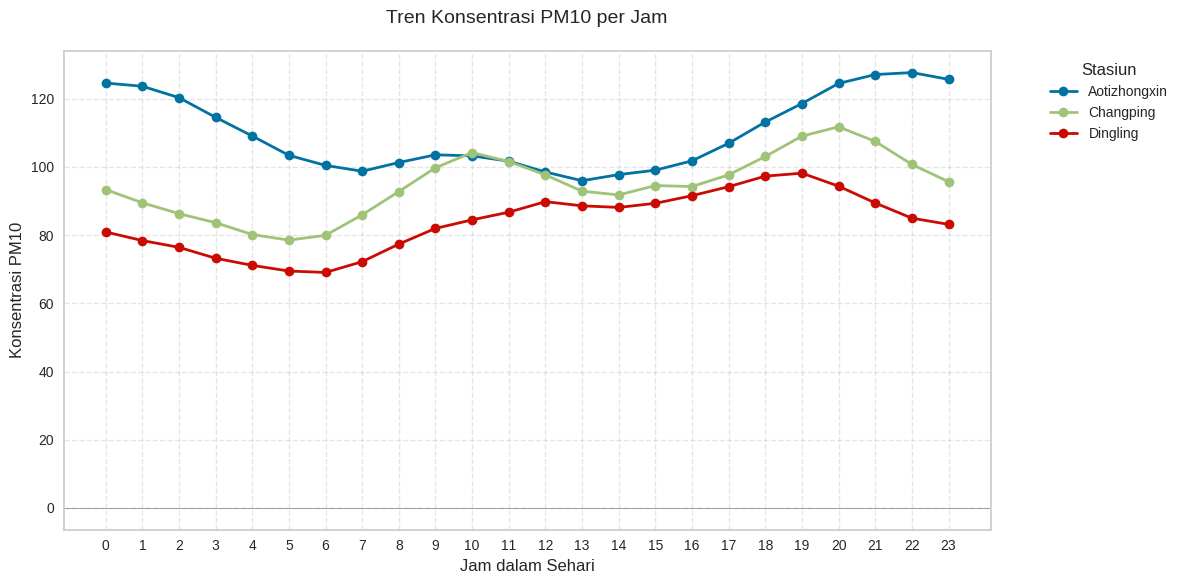

In [ ]:
# Tren Penyebaran PM10 Per Jam
polutan_pilihan = 'PM10'

# Hitung rata-rata per jam untuk setiap stasiun
hourly_means = kota.groupby(['station', 'hour_of_day'])[polutan_pilihan].mean().unstack(level=0)

plt.figure(figsize=(12, 6))

# Plot untuk setiap stasiun
for station in hourly_means.columns:
    plt.plot(hourly_means.index,
             hourly_means[station],
             marker='o',
             linestyle='-',
             linewidth=2,
             label=station)

plt.title(f'Tren Konsentrasi {polutan_pilihan} per Jam', fontsize=14, pad=20)
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel(f'Konsentrasi {polutan_pilihan}', fontsize=12)
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

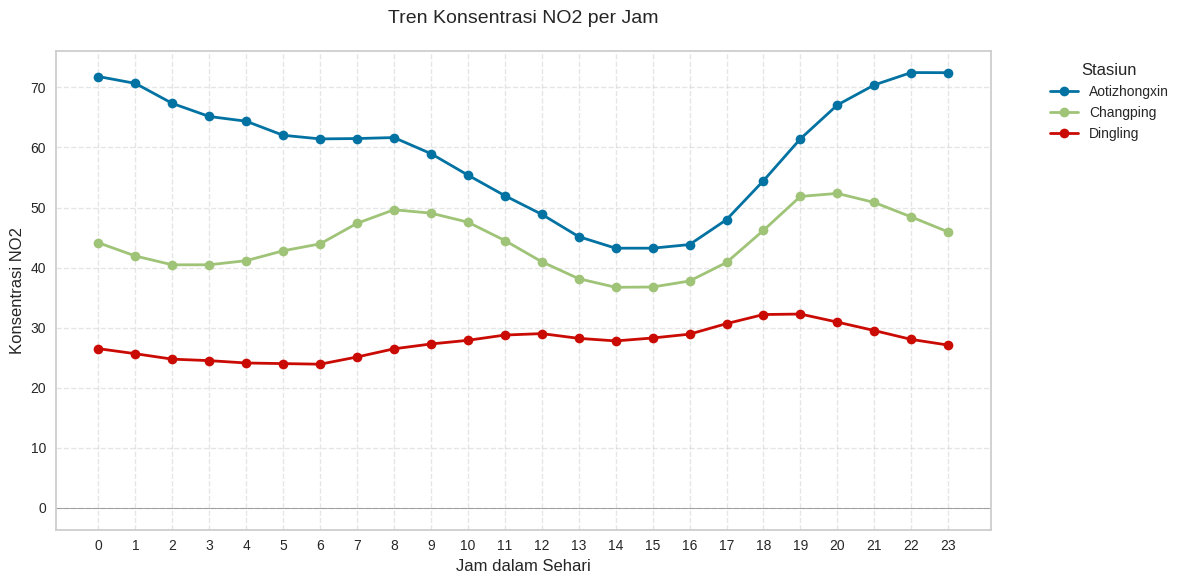

In [ ]:
# Tren Penyebaran NO2 Per Jam
polutan_pilihan = 'NO2'

# Hitung rata-rata per jam untuk setiap stasiun
hourly_means = kota.groupby(['station', 'hour_of_day'])[polutan_pilihan].mean().unstack(level=0)

plt.figure(figsize=(12, 6))

# Plot untuk setiap stasiun
for station in hourly_means.columns:
    plt.plot(hourly_means.index,
             hourly_means[station],
             marker='o',
             linestyle='-',
             linewidth=2,
             label=station)

plt.title(f'Tren Konsentrasi {polutan_pilihan} per Jam', fontsize=14, pad=20)
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel(f'Konsentrasi {polutan_pilihan}', fontsize=12)
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

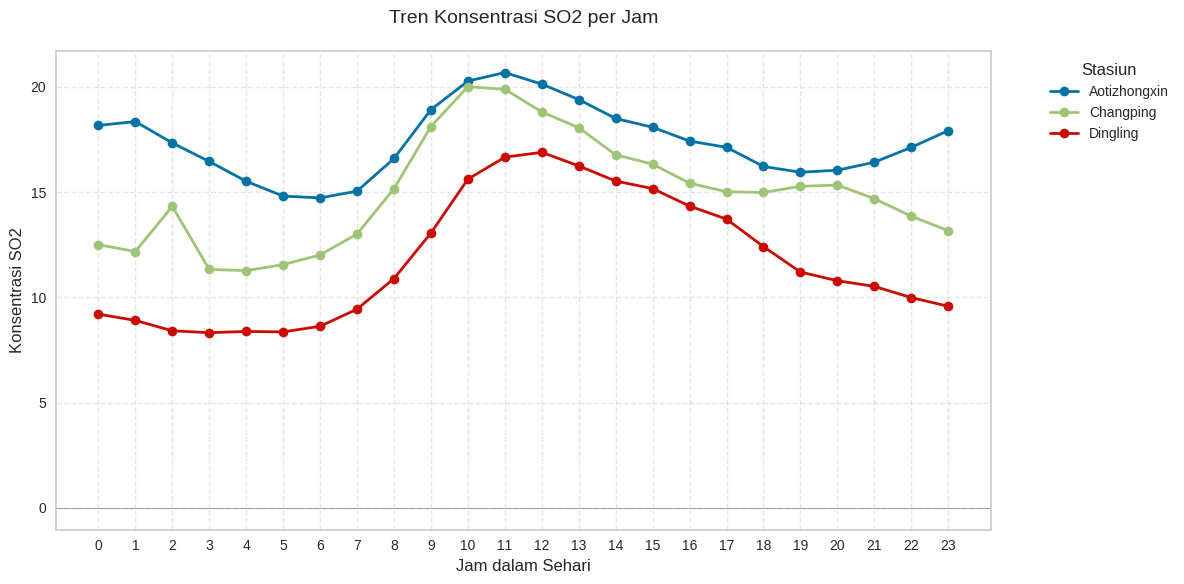

In [ ]:
# Tren Penyebaran SO2 Per Jam
polutan_pilihan = 'SO2'

# Hitung rata-rata per jam untuk setiap stasiun
hourly_means = kota.groupby(['station', 'hour_of_day'])[polutan_pilihan].mean().unstack(level=0)

plt.figure(figsize=(12, 6))

# Plot untuk setiap stasiun
for station in hourly_means.columns:
    plt.plot(hourly_means.index,
             hourly_means[station],
             marker='o',
             linestyle='-',
             linewidth=2,
             label=station)

plt.title(f'Tren Konsentrasi {polutan_pilihan} per Jam', fontsize=14, pad=20)
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel(f'Konsentrasi {polutan_pilihan}', fontsize=12)
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

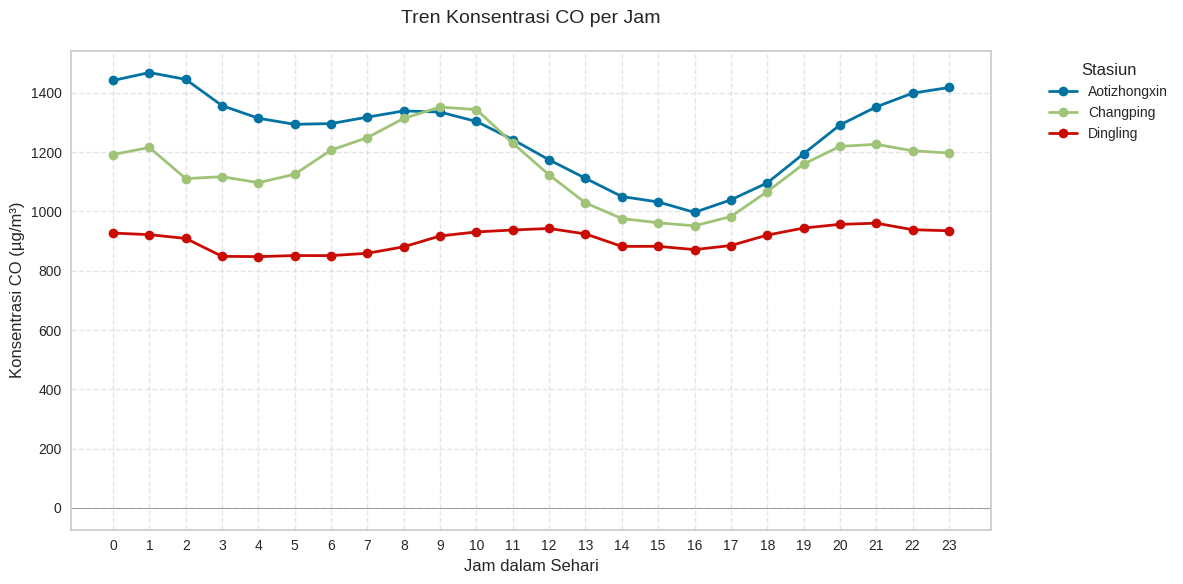

In [ ]:
# Tren Penyebaran CO Per Jam
polutan_pilihan = 'CO'

# Hitung rata-rata per jam untuk setiap stasiun
hourly_means = kota.groupby(['station', 'hour_of_day'])[polutan_pilihan].mean().unstack(level=0)

plt.figure(figsize=(12, 6))

# Plot untuk setiap stasiun
for station in hourly_means.columns:
    plt.plot(hourly_means.index,
             hourly_means[station],
             marker='o',
             linestyle='-',
             linewidth=2,
             label=station)

plt.title(f'Tren Konsentrasi {polutan_pilihan} per Jam', fontsize=14, pad=20)
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel(f'Konsentrasi {polutan_pilihan} (µg/m³)', fontsize=12)
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

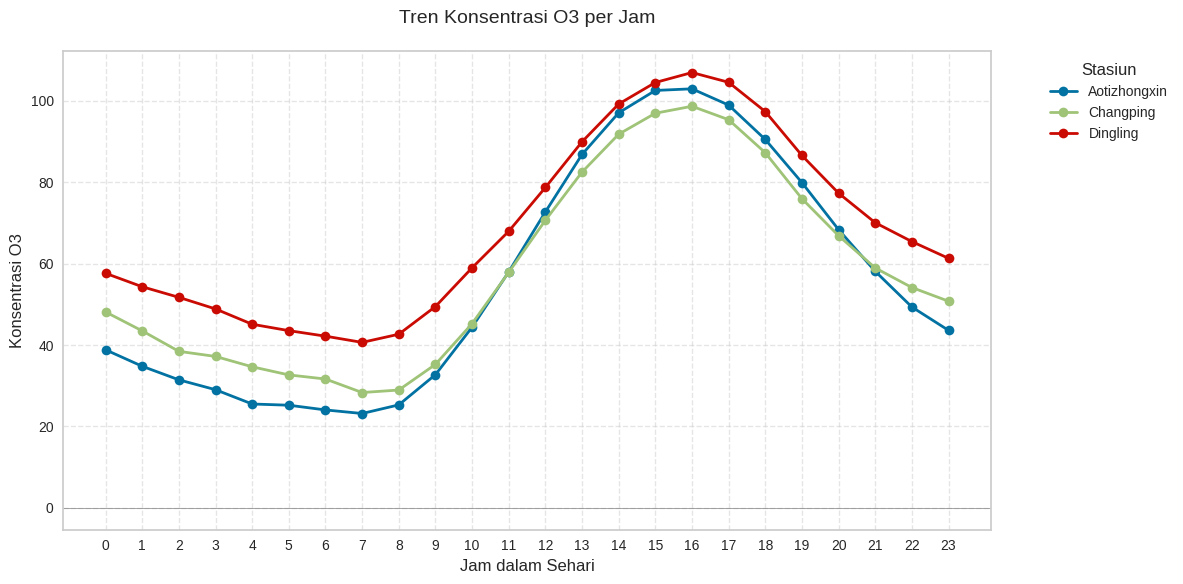

In [ ]:
# Tren Penyebaran O3 Per Jam
polutan_pilihan = 'O3'

# Hitung rata-rata per jam untuk setiap stasiun
hourly_means = kota.groupby(['station', 'hour_of_day'])[polutan_pilihan].mean().unstack(level=0)

plt.figure(figsize=(12, 6))

# Plot untuk setiap stasiun
for station in hourly_means.columns:
    plt.plot(hourly_means.index,
             hourly_means[station],
             marker='o',
             linestyle='-',
             linewidth=2,
             label=station)

plt.title(f'Tren Konsentrasi {polutan_pilihan} per Jam', fontsize=14, pad=20)
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel(f'Konsentrasi {polutan_pilihan}', fontsize=12)
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

Tren Bulanan

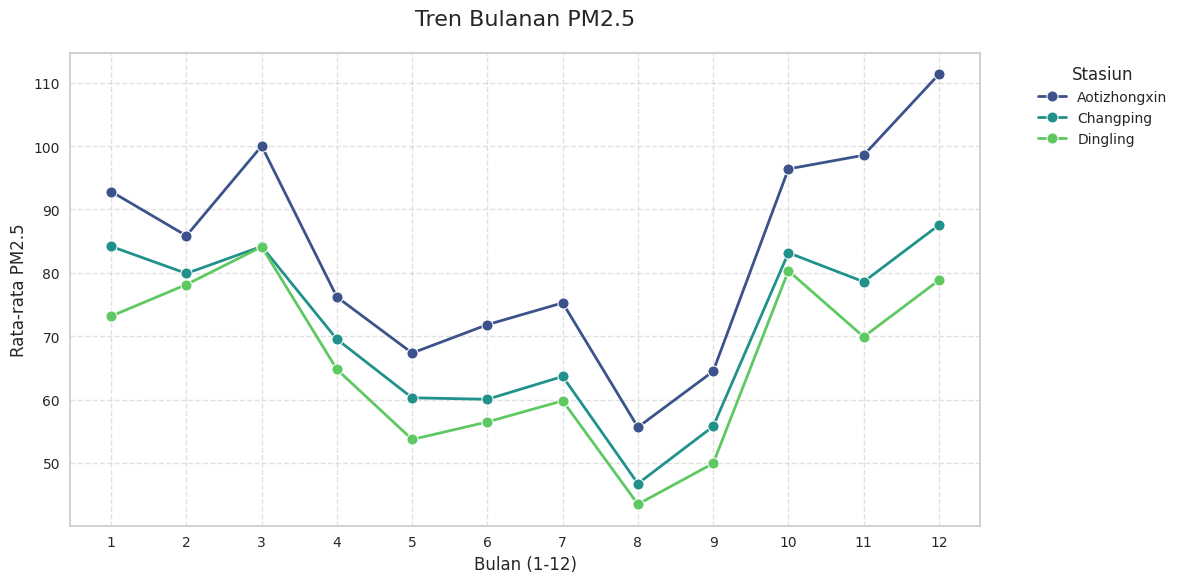

In [ ]:
# Tren Penyebaran PM2.5 Per Bulan
polutan_pilihan = 'PM2.5'

# 3. Hitung rata-rata bulanan per stasiun
monthly_means = kota.groupby(['station', 'month'])[polutan_pilihan].mean().reset_index()

# 4. Plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Buat lineplot dengan hue untuk stasiun
sns.lineplot(
    data=monthly_means,
    x='month',
    y=polutan_pilihan,
    hue='station',
    marker='o',
    linewidth=2,
    markersize=8,
    palette='viridis'
)

plt.title(f'Tren Bulanan {polutan_pilihan}', fontsize=16, pad=20)
plt.xlabel('Bulan (1-12)', fontsize=12)
plt.ylabel(f'Rata-rata {polutan_pilihan}', fontsize=12)

plt.xticks(range(1, 13),
           labels=[str(i) for i in range(1, 13)])

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

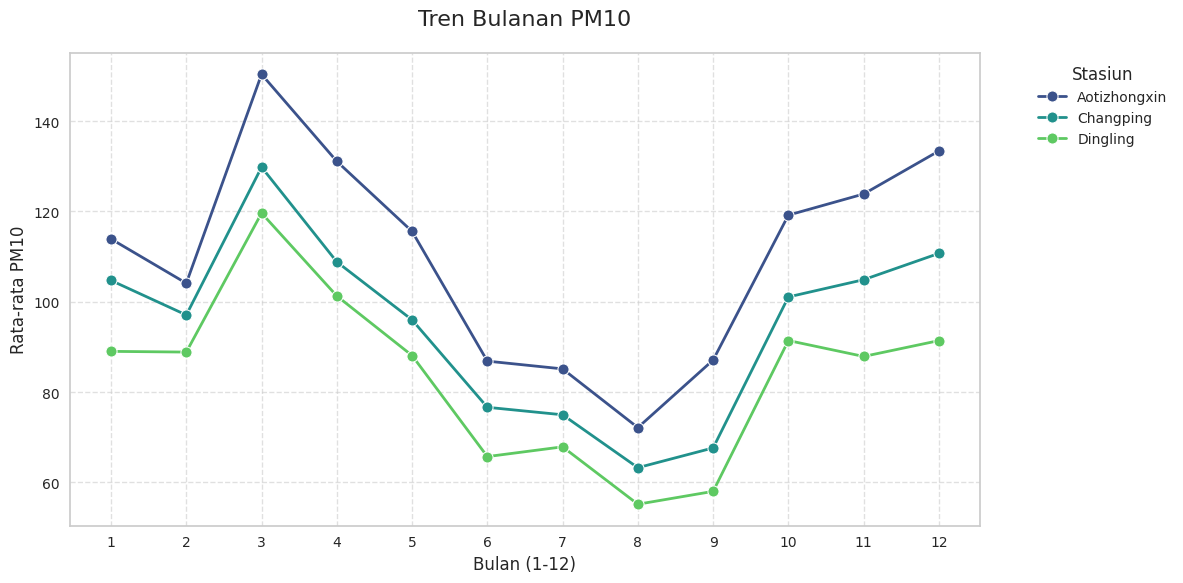

In [ ]:
# Tren Penyebaran PM10 Per Bulan
polutan_pilihan = 'PM10'

# 3. Hitung rata-rata bulanan per stasiun
monthly_means = kota.groupby(['station', 'month'])[polutan_pilihan].mean().reset_index()

# 4. Plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Buat lineplot dengan hue untuk stasiun
sns.lineplot(
    data=monthly_means,
    x='month',
    y=polutan_pilihan,
    hue='station',
    marker='o',
    linewidth=2,
    markersize=8,
    palette='viridis'
)

plt.title(f'Tren Bulanan {polutan_pilihan}', fontsize=16, pad=20)
plt.xlabel('Bulan (1-12)', fontsize=12)
plt.ylabel(f'Rata-rata {polutan_pilihan}', fontsize=12)

plt.xticks(range(1, 13),
           labels=[str(i) for i in range(1, 13)])

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

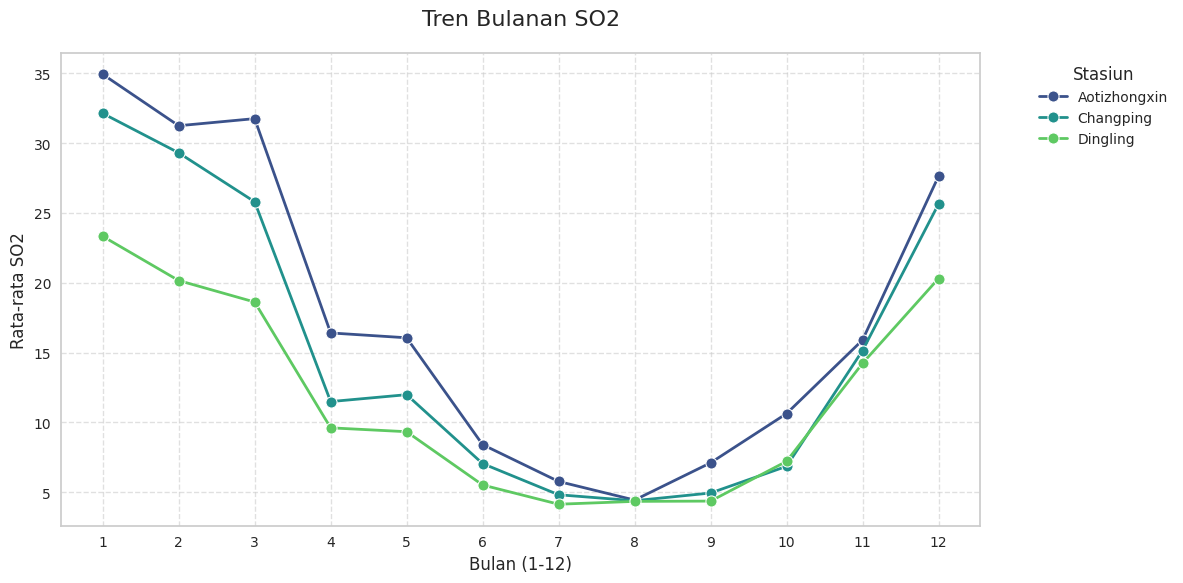

In [ ]:
# Tren Penyebaran SO2 Per Bulan
polutan_pilihan = 'SO2'

# 3. Hitung rata-rata bulanan per stasiun
monthly_means = kota.groupby(['station', 'month'])[polutan_pilihan].mean().reset_index()

# 4. Plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Buat lineplot dengan hue untuk stasiun
sns.lineplot(
    data=monthly_means,
    x='month',
    y=polutan_pilihan,
    hue='station',
    marker='o',
    linewidth=2,
    markersize=8,
    palette='viridis'
)

plt.title(f'Tren Bulanan {polutan_pilihan}', fontsize=16, pad=20)
plt.xlabel('Bulan (1-12)', fontsize=12)
plt.ylabel(f'Rata-rata {polutan_pilihan}', fontsize=12)

plt.xticks(range(1, 13),
           labels=[str(i) for i in range(1, 13)])

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

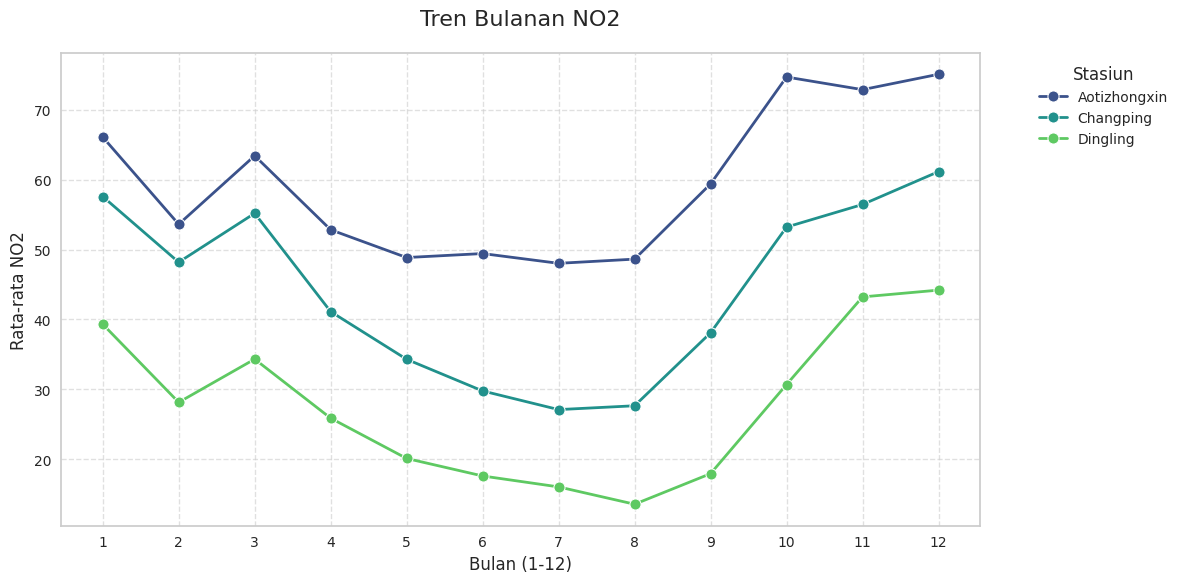

In [ ]:
# Tren Penyebaran NO2 Per Bulan
polutan_pilihan = 'NO2'

# 3. Hitung rata-rata bulanan per stasiun
monthly_means = kota.groupby(['station', 'month'])[polutan_pilihan].mean().reset_index()

# 4. Plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Buat lineplot dengan hue untuk stasiun
sns.lineplot(
    data=monthly_means,
    x='month',
    y=polutan_pilihan,
    hue='station',
    marker='o',
    linewidth=2,
    markersize=8,
    palette='viridis'
)

plt.title(f'Tren Bulanan {polutan_pilihan}', fontsize=16, pad=20)
plt.xlabel('Bulan (1-12)', fontsize=12)
plt.ylabel(f'Rata-rata {polutan_pilihan}', fontsize=12)

plt.xticks(range(1, 13),
           labels=[str(i) for i in range(1, 13)])

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

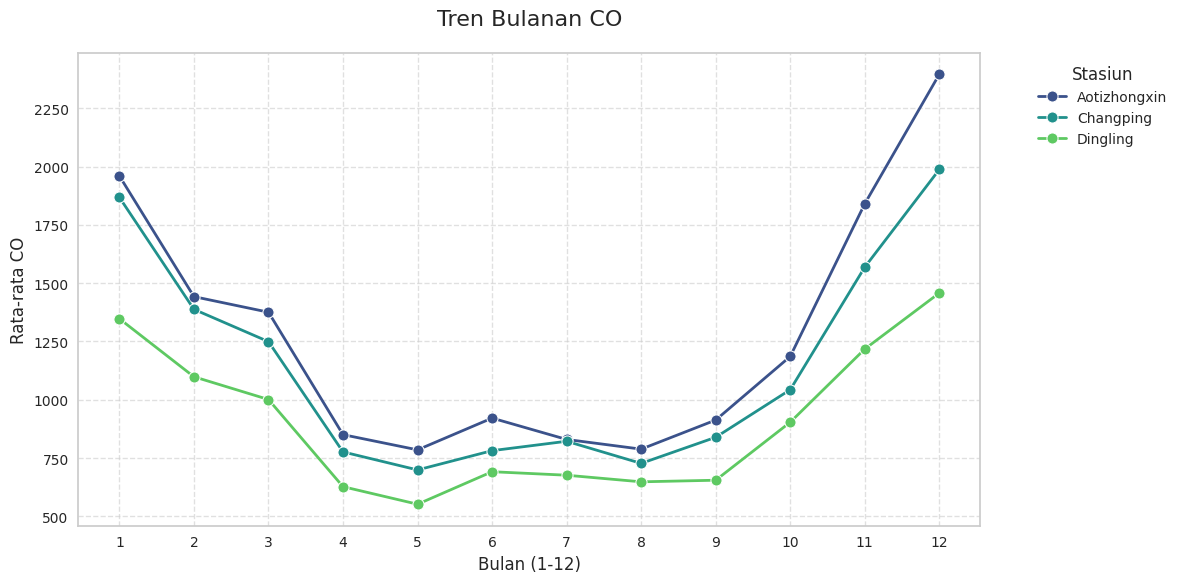

In [ ]:
# Tren Penyebaran CO Per Bulan
polutan_pilihan = 'CO'

# 3. Hitung rata-rata bulanan per stasiun
monthly_means = kota.groupby(['station', 'month'])[polutan_pilihan].mean().reset_index()

# 4. Plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Buat lineplot dengan hue untuk stasiun
sns.lineplot(
    data=monthly_means,
    x='month',
    y=polutan_pilihan,
    hue='station',
    marker='o',
    linewidth=2,
    markersize=8,
    palette='viridis'
)

plt.title(f'Tren Bulanan {polutan_pilihan}', fontsize=16, pad=20)
plt.xlabel('Bulan (1-12)', fontsize=12)
plt.ylabel(f'Rata-rata {polutan_pilihan}', fontsize=12)

plt.xticks(range(1, 13),
           labels=[str(i) for i in range(1, 13)])

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

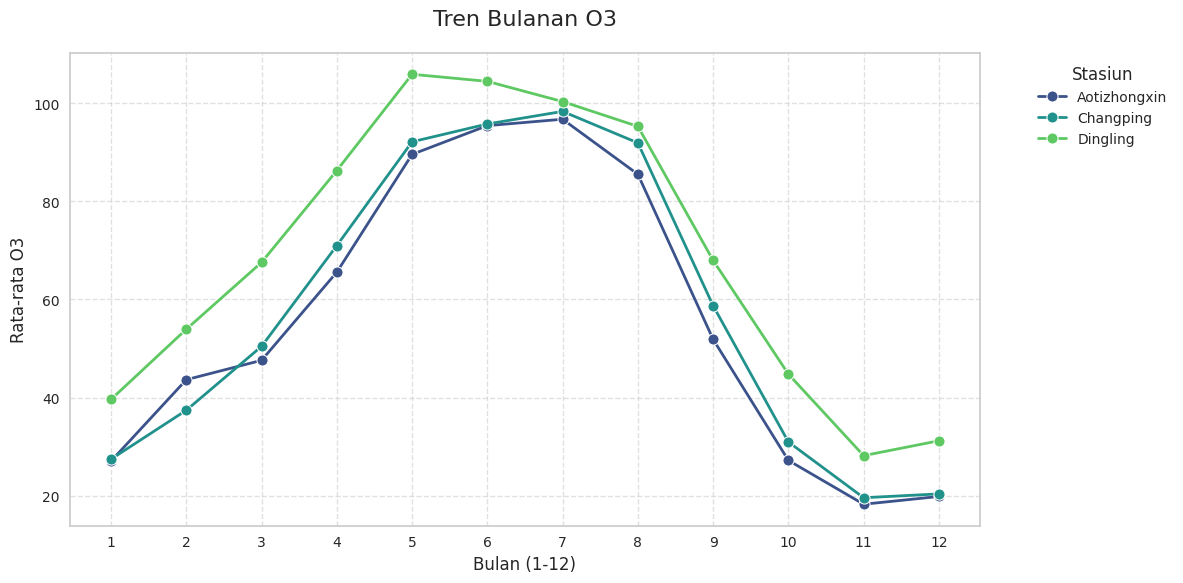

In [ ]:
# Tren Penyebaran O3 Per Bulan
polutan_pilihan = 'O3'

# 3. Hitung rata-rata bulanan per stasiun
monthly_means = kota.groupby(['station', 'month'])[polutan_pilihan].mean().reset_index()

# 4. Plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Buat lineplot dengan hue untuk stasiun
sns.lineplot(
    data=monthly_means,
    x='month',
    y=polutan_pilihan,
    hue='station',
    marker='o',
    linewidth=2,
    markersize=8,
    palette='viridis'
)

plt.title(f'Tren Bulanan {polutan_pilihan}', fontsize=16, pad=20)
plt.xlabel('Bulan (1-12)', fontsize=12)
plt.ylabel(f'Rata-rata {polutan_pilihan}', fontsize=12)

plt.xticks(range(1, 13),
           labels=[str(i) for i in range(1, 13)])

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
kota.head()

,No,year,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,hour_of_day,day_of_week
0,1,2013,3,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00,0,4
1,2,2013,3,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00,1,4
2,3,2013,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00,2,4
3,4,2013,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00,3,4
4,5,2013,3,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00,4,4


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
kota = kota.drop('No', axis=1)

## Menangani Missing Value

In [ ]:
# Kolom PM2.5
kota['PM2.5'] = kota.groupby("station")["PM2.5"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['PM2.5'].isnull().sum())

Jumlah Missing Value:  0


In [ ]:
# Kolom PM10
kota['PM10'] = kota.groupby("station")["PM10"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['PM10'].isnull().sum())

Jumlah Missing Value:  0


In [ ]:
# Kolom SO2
kota['SO2'] = kota.groupby("station")["SO2"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['SO2'].isnull().sum())

Jumlah Missing Value:  0


In [ ]:
# Kolom NO2
kota['NO2'] = kota.groupby("station")["NO2"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['NO2'].isnull().sum())

Jumlah Missing Value:  0


In [ ]:
# Kolom CO
kota['CO'] = kota.groupby("station")["CO"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['CO'].isnull().sum())

Jumlah Missing Value:  0


In [ ]:
# Kolom O3
kota['O3'] = kota.groupby("station")["O3"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['O3'].isnull().sum())

Jumlah Missing Value:  0


In [ ]:
# Kolom TEMP
kota['TEMP'] = kota.groupby("station")["TEMP"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['TEMP'].isnull().sum())
#

Jumlah Missing Value:  0


In [ ]:
# Kolom PRES
kota['PRES'] = kota.groupby("station")["PRES"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['PRES'].isnull().sum())

Jumlah Missing Value:  0


In [ ]:
# Kolom DEWP
kota['DEWP'] = kota.groupby("station")["DEWP"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['DEWP'].isnull().sum())

Jumlah Missing Value:  0


In [ ]:
# Kolom RAIN
kota['RAIN'] = kota.groupby("station")["RAIN"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['RAIN'].isnull().sum())

Jumlah Missing Value:  0


In [ ]:
# Kolom WSPM
kota['WSPM'] = kota.groupby("station")["WSPM"].transform(lambda x: x.fillna(x.mean()))
print('Jumlah Missing Value: ', kota['WSPM'].isnull().sum())
#

Jumlah Missing Value:  0


In [ ]:
# Mengatasi Missing Value kolom wd
kota['wd'] = kota.groupby('station')['wd'].transform(lambda x: x.fillna(x.mode()[0]))
print('Jumlah Missing Value: ', kota['wd'].isnull().sum())

Jumlah Missing Value:  0


## Deteksi Outliers

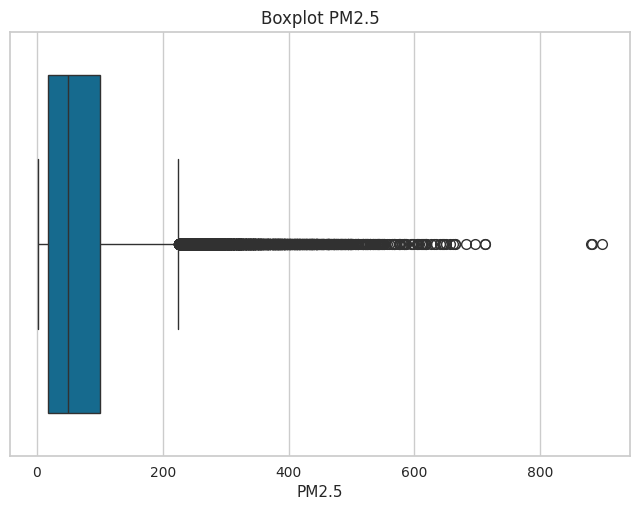

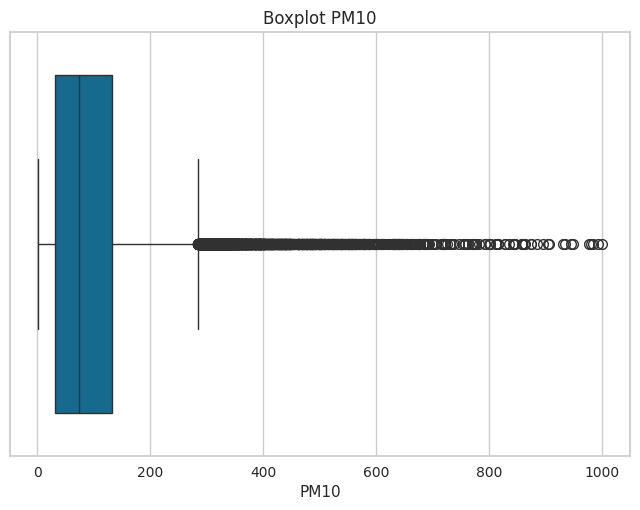

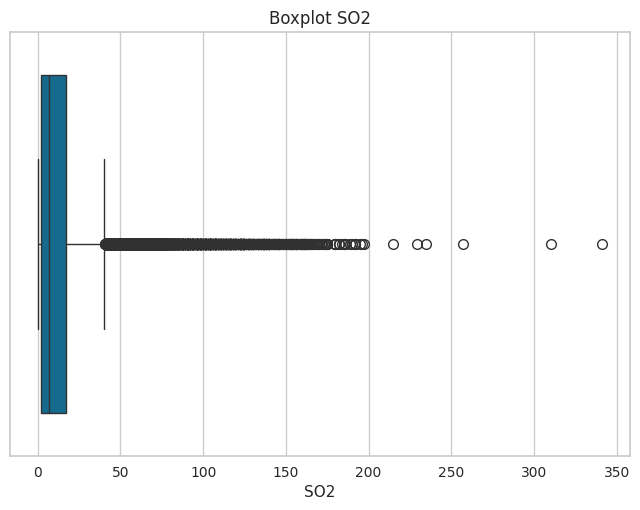

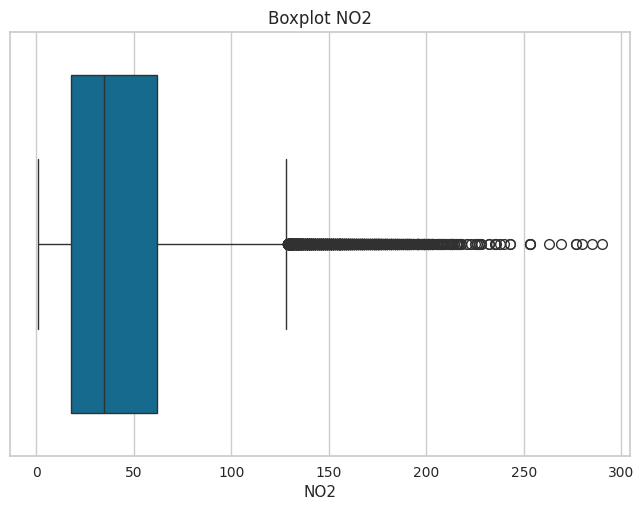

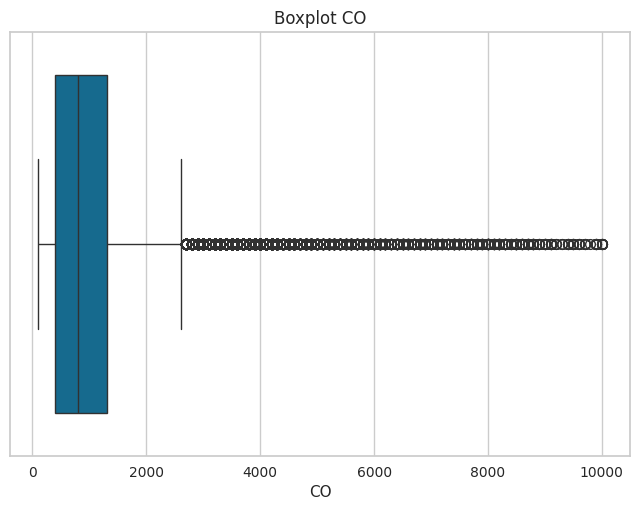

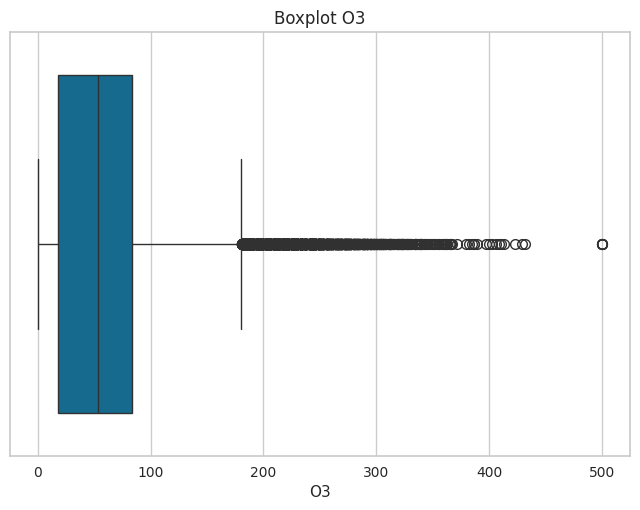

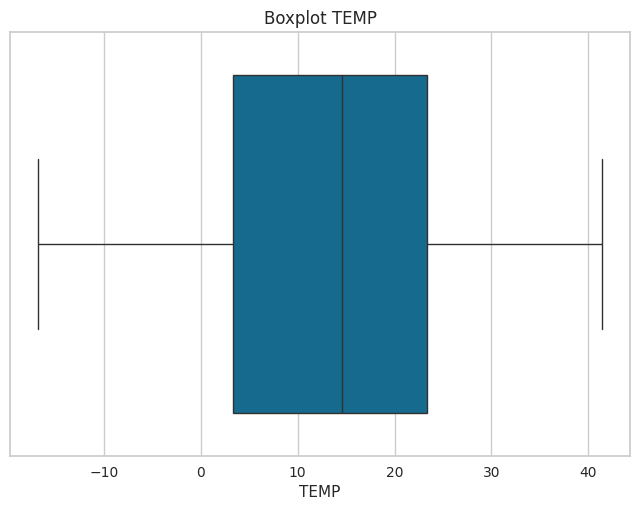

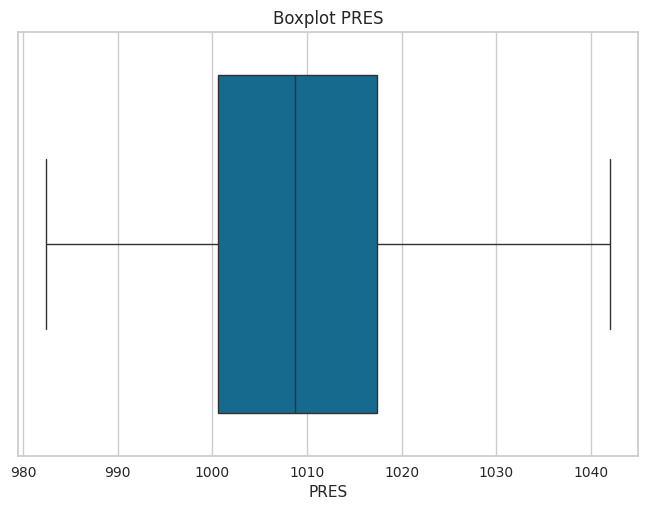

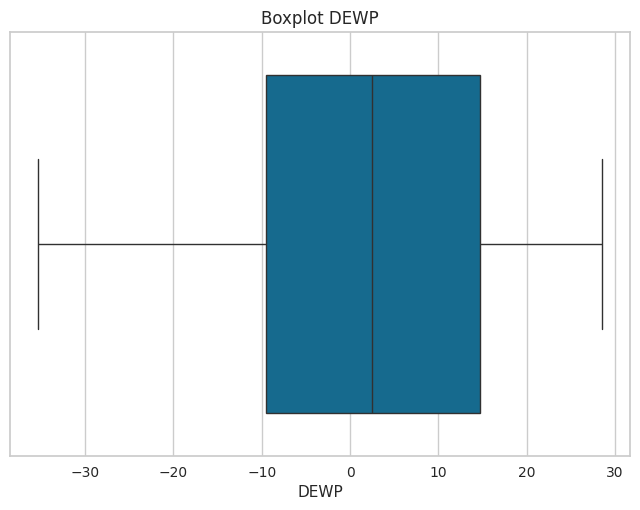

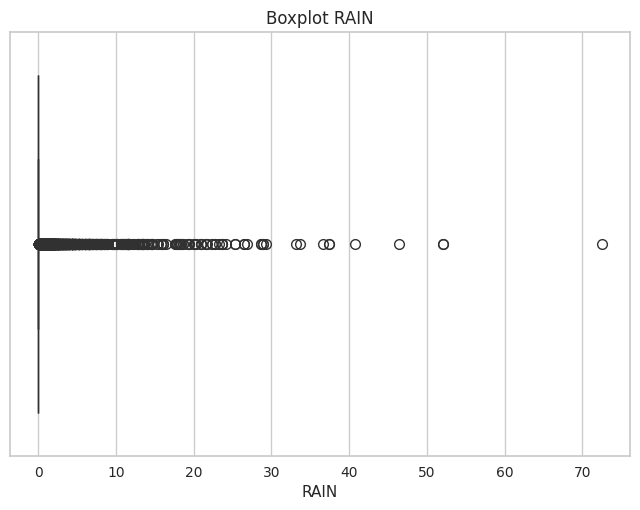

Text(0.5, 1.0, 'Boxplot WSPM')

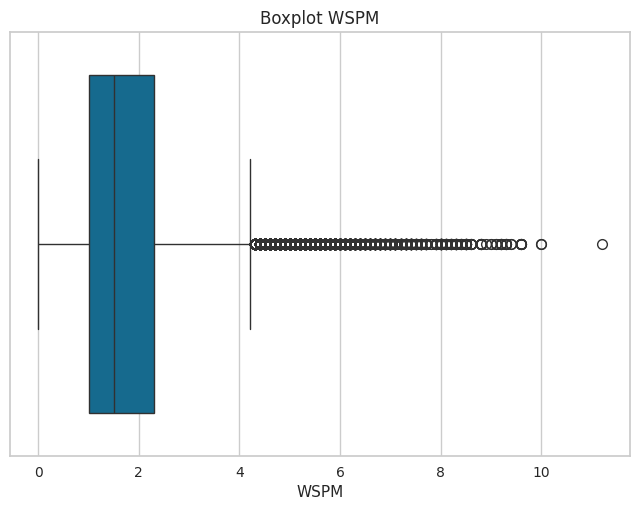

In [ ]:
# PM2.5
sns.boxplot(x=kota['PM2.5']) # Deteksi
plt.title("Boxplot PM2.5")
plt.show()

# PM10
sns.boxplot(x=kota['PM10']) # Deteksi
plt.title("Boxplot PM10")
plt.show()

# SO2
sns.boxplot(x=kota['SO2']) # Deteksi
plt.title("Boxplot SO2")
plt.show()

# NO2
sns.boxplot(x=kota['NO2']) # Deteksi
plt.title("Boxplot NO2")
plt.show()

# CO
sns.boxplot(x=kota['CO']) # Deteksi
plt.title("Boxplot CO")
plt.show()

# O3
sns.boxplot(x=kota['O3']) # Deteksi
plt.title("Boxplot O3")
plt.show()

# TEMP
sns.boxplot(x=kota['TEMP']) # Deteksi
plt.title("Boxplot TEMP")
plt.show()

# PRES
sns.boxplot(x=kota['PRES']) # Deteksi
plt.title("Boxplot PRES")
plt.show()

# DEWP
sns.boxplot(x=kota['DEWP']) # Deteksi
plt.title("Boxplot DEWP")
plt.show()

# RAIN
sns.boxplot(x=kota['RAIN']) # Deteksi
plt.title("Boxplot RAIN")
plt.show()

# WSPM
sns.boxplot(x=kota['WSPM']) # Deteksi
plt.title("Boxplot WSPM")

In [ ]:
# Hitung outliers melalui IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers, len(outliers), (len(outliers) / len(data)) * 100  # Jumlah dan persentase outlier

# Hitung presentase outliers untuk polutan
outliers_pm25, count_pm25, percent_pm25 = detect_outliers_iqr(kota, "PM2.5")
outliers_pm10, count_pm10, percent_pm10 = detect_outliers_iqr(kota, "PM10")
outliers_so2, count_so2, percent_so2 = detect_outliers_iqr(kota, "SO2")
outliers_no2, count_no2, percent_no2 = detect_outliers_iqr(kota, "NO2")
outliers_co, count_co, percent_co = detect_outliers_iqr(kota, "CO")
outliers_o3, count_o3, percent_o3 = detect_outliers_iqr(kota, "O3")

# Hitung presentase outliers untuk faktor polutan
outliers_temp, count_temp, percent_temp = detect_outliers_iqr(kota, "TEMP")
outliers_pres, count_pres, percent_pres = detect_outliers_iqr(kota, "PRES")
outliers_dewp, count_dewp, percent_dewp = detect_outliers_iqr(kota, "DEWP")
outliers_rain, count_rain, percent_rain = detect_outliers_iqr(kota, "RAIN")
outliers_wspm, count_wspm, percent_wspm = detect_outliers_iqr(kota, "WSPM")

# Tampilkan presentase outliers hasil polutan
print(f"Outlier PM2.5: {count_pm25} data ({percent_pm25:.2f}%)")
print(f"Outlier PM10: {count_pm10} data ({percent_pm10:.2f}%)")
print(f"Outlier SO2: {count_so2} data ({percent_so2:.2f}%)")
print(f"Outlier NO2: {count_no2} data ({percent_no2:.2f}%)")
print(f"Outlier CO: {count_co} data ({percent_co:.2f}%)")
print(f"Outlier O3: {count_o3} data ({percent_o3:.2f}%)")


# Tampilkan hasil faktor polutan
print(f"Outlier TEMP: {count_temp} data ({percent_temp:.2f}%)")
print(f"Outlier PRES: {count_pres} data ({percent_pres:.2f}%)")
print(f"Outlier DEWP: {count_dewp} data ({percent_dewp:.2f}%)")
print(f"Outlier RAIN: {count_rain} data ({percent_rain:.2f}%)")
print(f"Outlier WSPM: {count_wspm} data ({percent_wspm:.2f}%)")

Outlier PM2.5: 5405 data (5.14%)
Outlier PM10: 3971 data (3.78%)
Outlier SO2: 9450 data (8.98%)
Outlier NO2: 2293 data (2.18%)
Outlier CO: 7968 data (7.57%)
Outlier O3: 4730 data (4.50%)
Outlier TEMP: 0 data (0.00%)
Outlier PRES: 0 data (0.00%)
Outlier DEWP: 0 data (0.00%)
Outlier RAIN: 4202 data (3.99%)
Outlier WSPM: 6342 data (6.03%)


## Encoding

In [ ]:
# Encoding pada kolom 'wd' dengan fungsi map
wind_dir_map = {
    'N': 0, 'NNE': 1, 'NE': 2, 'ENE': 3, 'E': 4, 'ESE': 5, 'SE': 6, 'SSE': 7,
    'S': 8, 'SSW': 9, 'SW': 10, 'WSW': 11, 'W': 12, 'WNW': 13, 'NW': 14, 'NNW': 15
}

kota['wd_encod'] = kota['wd'].map(wind_dir_map)

# Label Encoding pada kolom 'station'
label_encoder = LabelEncoder()
kota['station'] = label_encoder.fit_transform(kota['station'])


# Mengecek kolom setelah encoding
print(kota)
print("Kolom station: ", kota['station'])

        year  month  PM2.5  PM10   SO2   NO2     CO     O3  TEMP    PRES  \
0       2013      3    4.0   4.0   4.0   7.0  300.0   77.0  -0.7  1023.0   
1       2013      3    8.0   8.0   4.0   7.0  300.0   77.0  -1.1  1023.2   
2       2013      3    7.0   7.0   5.0  10.0  300.0   73.0  -1.1  1023.5   
3       2013      3    6.0   6.0  11.0  11.0  300.0   72.0  -1.4  1024.5   
4       2013      3    3.0   3.0  12.0  12.0  300.0   72.0  -2.0  1025.2   
...      ...    ...    ...   ...   ...   ...    ...    ...   ...     ...   
105187  2017      2   11.0  11.0   2.0   2.0  200.0   99.0  11.7  1008.9   
105188  2017      2   13.0  13.0   2.0   2.0  200.0  101.0  10.9  1009.0   
105189  2017      2    9.0  14.0   2.0   2.0  200.0  102.0   9.5  1009.4   
105190  2017      2   10.0  12.0   2.0   2.0  200.0   97.0   7.8  1009.6   
105191  2017      2   13.0  16.0   4.0   9.0  500.0   74.0   7.0  1009.4   

        DEWP  RAIN   wd  WSPM  station            datetime  hour_of_day  \
0      -18.8

<Axes: >

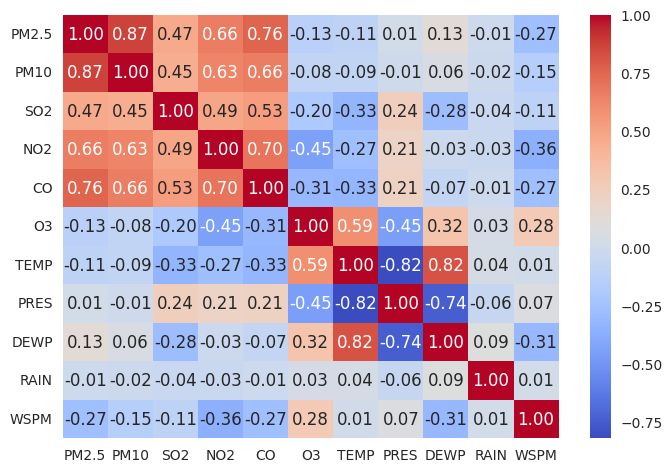

In [ ]:
kolom_analisis = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
sns.heatmap(kota[kolom_analisis].corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
for polutan in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    print(f"\nKorelasi {polutan} terhadap faktor lingkungan:")
    print(kota[[polutan, 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()[polutan].drop(polutan).sort_values(ascending=False))


Korelasi PM2.5 terhadap faktor lingkungan:
DEWP    0.126517
PRES    0.014179
RAIN   -0.010469
TEMP   -0.108829
WSPM   -0.267602
Name: PM2.5, dtype: float64

Korelasi PM10 terhadap faktor lingkungan:
DEWP    0.059320
PRES   -0.007408
RAIN   -0.023571
TEMP   -0.086040
WSPM   -0.151441
Name: PM10, dtype: float64

Korelasi SO2 terhadap faktor lingkungan:
PRES    0.242627
RAIN   -0.039128
WSPM   -0.105166
DEWP   -0.282540
TEMP   -0.331440
Name: SO2, dtype: float64

Korelasi NO2 terhadap faktor lingkungan:
PRES    0.207177
DEWP   -0.028047
RAIN   -0.034304
TEMP   -0.271584
WSPM   -0.360034
Name: NO2, dtype: float64

Korelasi CO terhadap faktor lingkungan:
PRES    0.211436
RAIN   -0.011354
DEWP   -0.072281
WSPM   -0.272166
TEMP   -0.325750
Name: CO, dtype: float64

Korelasi O3 terhadap faktor lingkungan:
TEMP    0.588682
DEWP    0.319880
WSPM    0.275674
RAIN    0.027087
PRES   -0.450973
Name: O3, dtype: float64


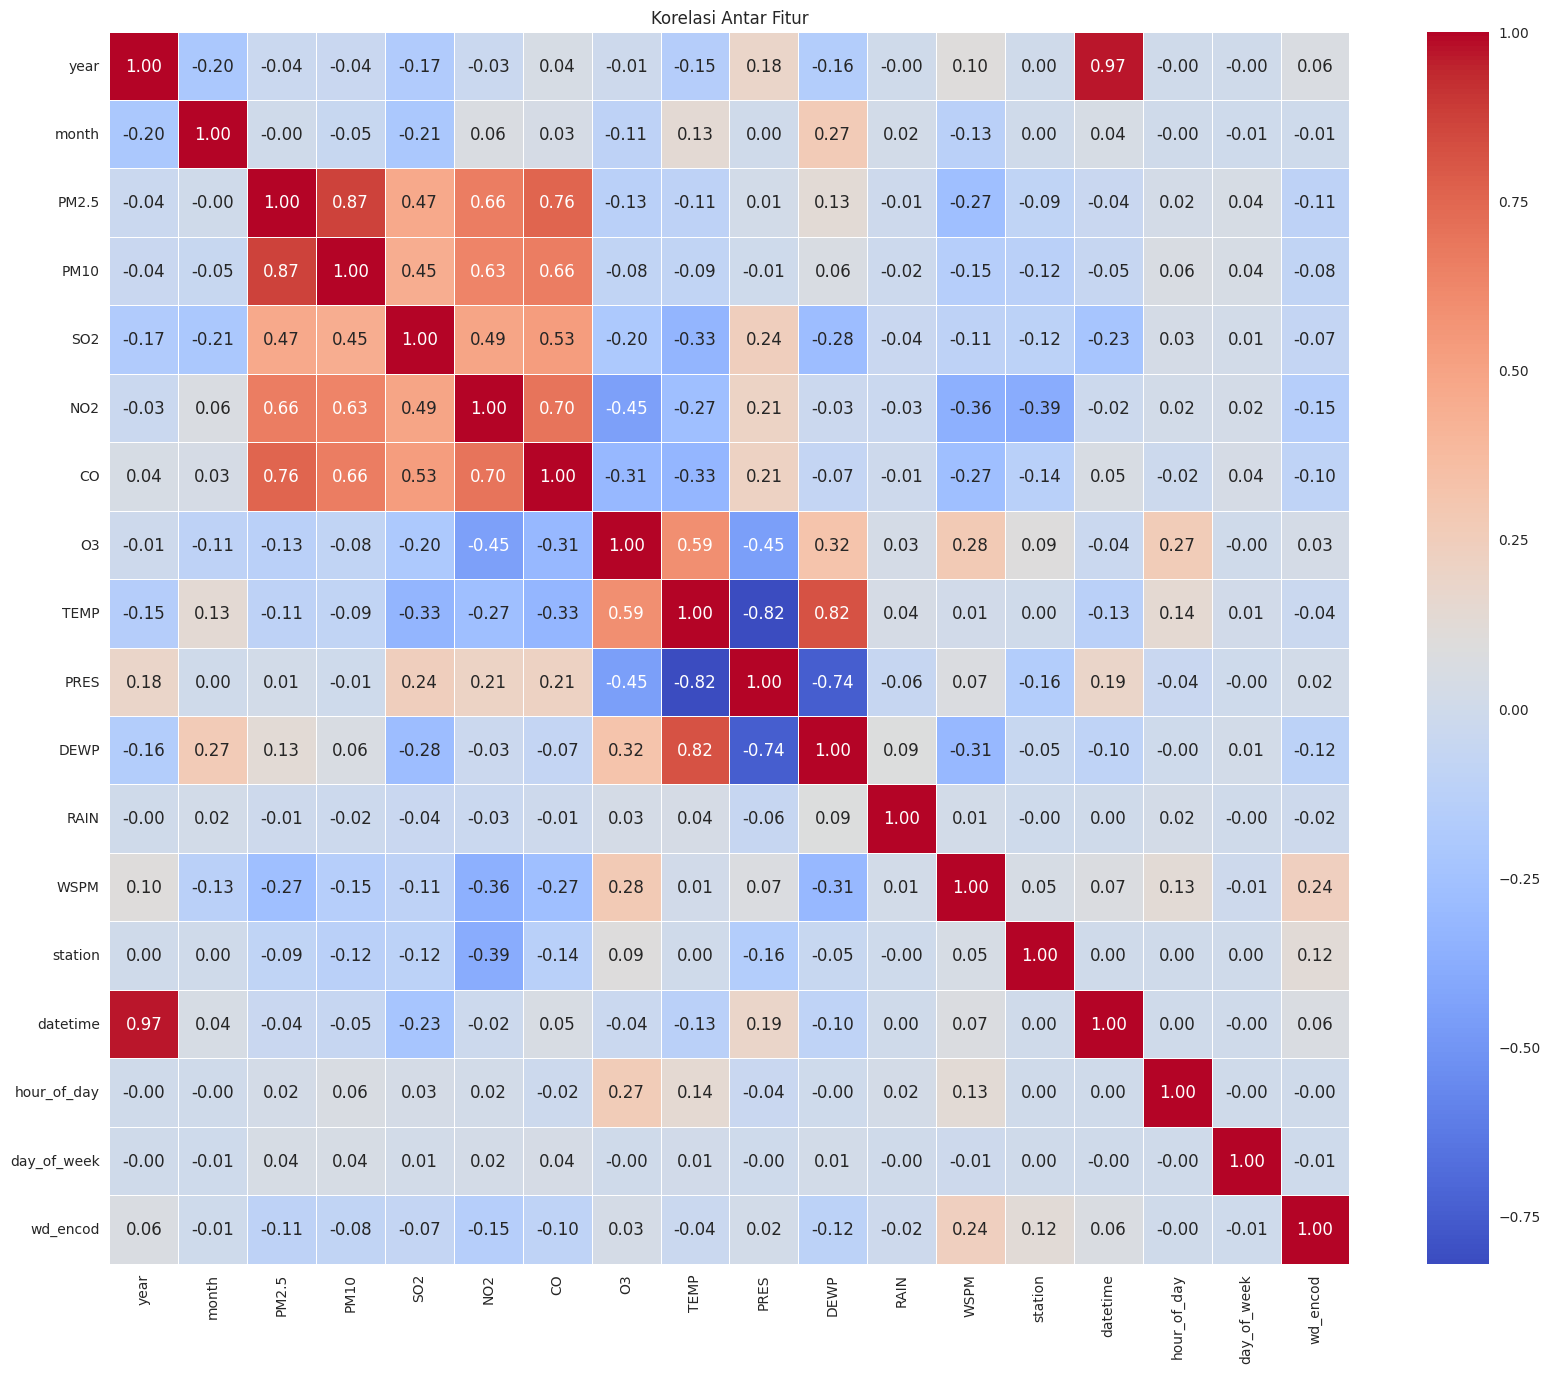

In [ ]:
# Hitung korelasi tanpa kolom wd
correlation_matrix = kota.drop(columns='wd').corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Fitur")
plt.show()

In [ ]:
top_correlations = correlation_matrix["PM2.5"].abs().sort_values(ascending=False).head(10)
print(top_correlations)

PM2.5       1.000000
PM10        0.866999
CO          0.756614
NO2         0.660221
SO2         0.469253
WSPM        0.267602
O3          0.126730
DEWP        0.126517
TEMP        0.108829
wd_encod    0.106189
Name: PM2.5, dtype: float64


In [ ]:
kota.head()

,year,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,hour_of_day,day_of_week,wd_encod
0,2013,3,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,0,2013-03-01 00:00:00,0,4,15
1,2013,3,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,0,2013-03-01 01:00:00,1,4,0
2,2013,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,0,2013-03-01 02:00:00,2,4,15
3,2013,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,0,2013-03-01 03:00:00,3,4,14
4,2013,3,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,0,2013-03-01 04:00:00,4,4,0


In [ ]:
# Fitur polutan untuk clustering
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
X = kota[features]

# Scaling hanya pada fitur polusi udara dengan RobustScaler
scaler = RobustScaler()
df_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled, columns=X.columns)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

K = 2, Silhouette Score = 0.4009
K = 3, Silhouette Score = 0.2074
K = 4, Silhouette Score = 0.2163
K = 5, Silhouette Score = 0.2197
K = 6, Silhouette Score = 0.2091
K = 7, Silhouette Score = 0.2207
K = 8, Silhouette Score = 0.2142
K = 9, Silhouette Score = 0.2183
K = 10, Silhouette Score = 0.2102


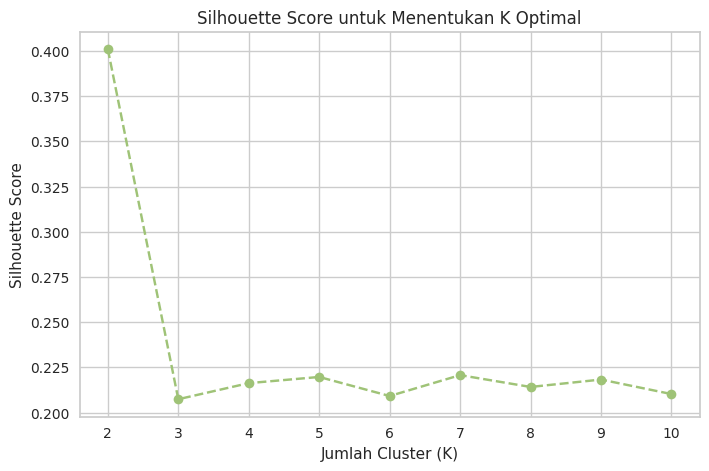

In [ ]:
# Menyimpan silhouette score untuk setiap K
silhouette_scores = []

for k in range(2, 11):  # Silhouette tidak bisa dihitung untuk K=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append((k, score))
    print(f'K = {k}, Silhouette Score = {score:.4f}')

# Menampilkan grafik Silhouette Score
k_values, scores = zip(*silhouette_scores)
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o', linestyle='--', color='g')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan K Optimal')
plt.show()


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

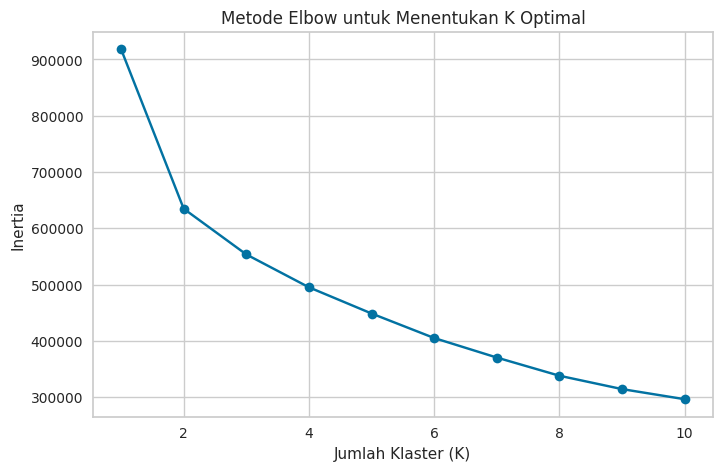

In [ ]:
# Menentukan jumlah klaster optimal dengan metode Elbow
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.show()

In [ ]:
# K-Means Clustering untuk K=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(df_scaled)  # Lakukan clustering pada data yang telah di-scaling
df_scaled['Cluster'] = kmeans.labels_

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# Terapkan PCA untuk mengurangi dimensi menjadi 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

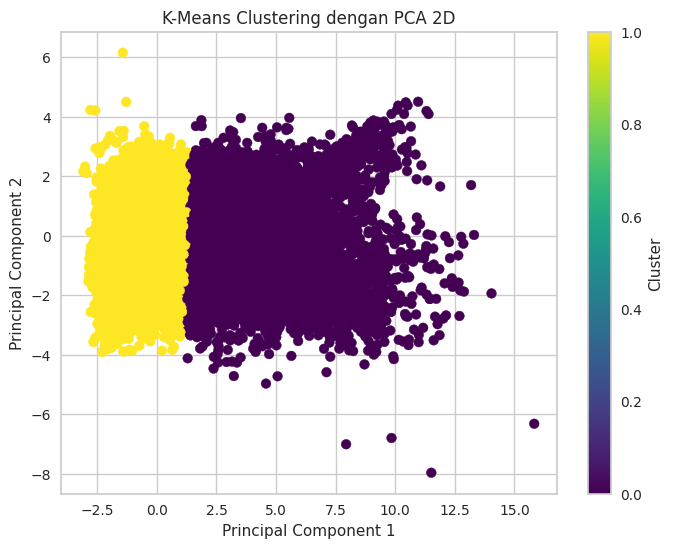

In [ ]:
# Visualisasi hasil clustering dengan PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_scaled['Cluster'], cmap='viridis')
plt.title('K-Means Clustering dengan PCA 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_scaled)  # sebelum clustering

# Melihat komponen PCA
components = pd.DataFrame(pca.components_, columns=df_scaled.columns, index=['PC1', 'PC2'])
print(components.T.sort_values('PC1', ascending=False))


              PC1       PC2
CO       0.535001  0.127539
SO2      0.504805 -0.415999
PM2.5    0.380253  0.288059
PM10     0.333715  0.233908
NO2      0.312021  0.076154
PRES     0.085450 -0.378930
RAIN    -0.016508  0.065980
DEWP    -0.043831  0.421681
TEMP    -0.114219  0.342576
Cluster -0.164265  0.019869
O3      -0.167236  0.252869
WSPM    -0.167744 -0.399670


In [ ]:
# Display the count of imbalanced data
pd.Series(df_scaled['Cluster']).value_counts()

,count
Cluster,
1,85028
0,20164


## **e. Analisis dan Interpretasi Hasil Cluster**

In [ ]:
# Inversi Data Fitur ke Skala Asli
df_dlt = df_scaled.drop(columns=['Cluster'], errors='ignore')  # Buang kolom Cluster sebelum inverse
df_original = scaler.inverse_transform(df_dlt)
df_original = pd.DataFrame(df_original, columns=X.columns)
df_original['Cluster'] = kmeans.labels_

In [ ]:
# Melakukan Agregasi Tiap Cluster
cluster_analysis = df_original.groupby('Cluster')[features].agg({
    'PM2.5': ['min', 'max', 'mean'],
    'PM10': ['min', 'max', 'mean'],
    'SO2': ['min', 'max', 'mean'],
    'NO2': ['min', 'max', 'mean'],
    'CO': ['min', 'max', 'mean'],
    'O3': ['min', 'max', 'mean']
})

# Menampilkan hasil agregasi
print("Analisis Statistik Tiap Cluster:")
print(cluster_analysis)

Analisis Statistik Tiap Cluster:
        PM2.5                    PM10                        SO2         \
          min    max        mean  min    max        mean     min    max   
Cluster                                                                   
0         3.0  898.0  177.644273  3.0  999.0  206.581917  1.0000  341.0   
1         2.0  358.0   48.539915  2.0  874.0   69.964871  0.2856   78.0   

                       NO2                       CO                       \
              mean     min    max       mean    min      max        mean   
Cluster                                                                    
0        41.433580  2.0000  290.0  88.706654  100.0  10000.0  2680.59907   
1         8.353844  1.0265  209.0  33.015903  100.0   5000.0   733.47461   

             O3                    
            min    max       mean  
Cluster                            
0        0.2142  348.0  25.253922  
1        0.2142  500.0  69.411752  


In [ ]:
# Interpretasi Pola Tiap Cluster
for cluster in cluster_analysis.index:
    pm25_mean = cluster_analysis.loc[cluster, ('PM2.5', 'mean')]
    pm10_mean = cluster_analysis.loc[cluster, ('PM10', 'mean')]
    so2_mean = cluster_analysis.loc[cluster, ('SO2', 'mean')]
    no2_mean = cluster_analysis.loc[cluster, ('NO2', 'mean')]
    co_mean = cluster_analysis.loc[cluster, ('CO', 'mean')]
    o3_mean = cluster_analysis.loc[cluster, ('O3', 'mean')]
    print(f"Cluster {cluster} memiliki rata-rata PM2.5 = {pm25_mean:.2f}, PM10 = {pm10_mean:.2f}, SO2 = {so2_mean:.2f}. NO2 = {no2_mean:.2f}, CO = {co_mean:.2f}, O3 = {o3_mean:.2f}")

Cluster 0 memiliki rata-rata PM2.5 = 177.64, PM10 = 206.58, SO2 = 41.43. NO2 = 88.71, CO = 2680.60, O3 = 25.25
Cluster 1 memiliki rata-rata PM2.5 = 48.54, PM10 = 69.96, SO2 = 8.35. NO2 = 33.02, CO = 733.47, O3 = 69.41


In [ ]:
# Statistik rata-rata tiap cluster
cluster_stats = df_original.groupby('Cluster')[features].mean()
print("Statistik rata-rata tiap cluster:")
print(cluster_stats)

# Menentukan zona dengan tingkat polusi tertinggi (berdasarkan rata-rata polutan)
highest_pollution_zone = cluster_stats.idxmax(axis=1)
print("Zona dengan tingkat polusi tertinggi per polutan:")
print(highest_pollution_zone)

Statistik rata-rata tiap cluster:
              PM2.5        PM10        SO2        NO2          CO         O3  \
Cluster                                                                        
0        177.644273  206.581917  41.433580  88.706654  2680.59907  25.253922   
1         48.539915   69.964871   8.353844  33.015903   733.47461  69.411752   

              TEMP         PRES      DEWP      RAIN      WSPM  
Cluster                                                        
0         5.349515  1014.155439 -3.138382  0.011029  1.236772  
1        15.621239  1007.928952  3.273825  0.074975  1.940235  
Zona dengan tingkat polusi tertinggi per polutan:
Cluster
0      CO
1    PRES
dtype: object


# Analisis Hasil Interpretasi Cluster

Berikut adalah analisis hasil interpretasi untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata PM2.5:** Rata-rata 177.64, menunjukkan tingkat polusi partikel halus yang tinggi.
- **Rata-rata PM10:** Rata-rata 206.58, mengindikasikan polusi udara signifikan.
- **Rata-rata SO2:** Rata-rata 41.43, menunjukkan kandungan sulfur dioksida yang cukup tinggi.
- **Rata-rata NO2:** Rata-rata 88.70, mengindikasikan konsentrasi nitrogen dioksida yang tinggi, sering terkait dengan emisi kendaraan dan industri.
- **Rata-rata CO:** Rata-rata 2680.59, sangat tinggi, menunjukkan adanya sumber polusi karbon monoksida besar.
- **Rata-rata O3:** Rata-rata 25.25, relatif rendah dibandingkan dengan cluster lain.
- Rata-rata TEMP: 5.35 –> suhu sangat rendah, menunjukkan wilayah dengan iklim dingin atau musim dingin.
- Rata-rata PRES: 1014.15 –> tekanan udara relatif tinggi, yang kadang berhubungan dengan udara stagnan dan akumulasi polutan.
- Rata-rata DEWP: -3.14 –> titik embun negatif, menunjukkan udara sangat kering.
- Rata-rata RAIN: 0.011 –> hampir tidak ada curah hujan, yang menyebabkan polutan tidak terbawa oleh air hujan dan tetap terperangkap di atmosfer.
- Rata-rata WSPM (kecepatan angin): 1.24 – rendah, berarti pergerakan udara minim, sehingga polutan sulit menyebar dan terjebak di satu area.
- **Analisis:**

Cluster 0 merupakan wilayah atau waktu dengan kondisi polusi udara sangat tinggi. Tingkat PM2.5, PM10, SO2, NO2, dan CO sangat dominan, menunjukkan adanya aktivitas manusia yang intens seperti industri berat, pembakaran bahan bakar fosil, dan lalu lintas kendaraan bermotor padat. Selain itu, kondisi lingkungan mendukung akumulasi polusi: suhu rendah, kelembapan rendah (DEWP negatif), angin lemah, dan curah hujan hampir tidak ada. O₃ yang rendah juga mendukung kemungkinan bahwa udara tercemar oleh polutan primer secara signifikan. Ini dapat dikategorikan sebagai area dengan risiko polusi udara tinggi dan membahayakan kesehatan manusia, terutama pada musim dingin atau kondisi atmosfer yang stabil.


## Cluster 1:
- **Rata-rata PM2.5:** Rata-rata 48.54, jauh lebih rendah dibandingkan Cluster 0, menunjukkan kualitas udara yang lebih baik terkait partikel halus.
- **Rata-rata PM10:** Rata-rata 69.96, lebih rendah dari Cluster 0, mengindikasikan tingkat polusi partikel kasar yang masih dalam batas wajar.
- **Rata-rata SO2:** Rata-rata 8.35, menunjukkan kandungan sulfur dioksida yang rendah, mengindikasikan minimnya pembakaran bahan bakar fosil seperti batu bara.
- **Rata-rata NO2:** Rata-rata 33.01, lebih rendah, menunjukkan polusi nitrogen dioksida lebih ringan.
- **Rata-rata CO:** Rata-rata 33.02, jauh lebih rendah dibandingkan Cluster 0, menunjukkan sedikit aktivitas emisi kendaraan atau industri.
- **Rata-rata O3:** Rata-rata 69.41, cukup tinggi, yang bisa muncul akibat reaksi kimia antara NOx dan senyawa organik volatil (VOC) di bawah sinar matahari.
- Rata-rata TEMP: Rata-rata 15.62, jauh lebih hangat dibandingkan dengan Cluster 0.
- Rata-rata PRES: Rata-rata 1007.93, sedikit lebih rendah dari Cluster 0.
- Rata-rata DEWP: Rata-rata 3.27, menunjukkan tingkat kelembapan yang lebih tinggi dibandingkan Cluster 0.
- Rata-rata RAIN: Rata-rata 0.075, lebih tinggi, mengindikasikan curah hujan yang lebih sering terjadi.
- Rata-rata WSPM (kecepatan angin): Rata-rata 1.94, lebih tinggi dari Cluster 0, menunjukkan kondisi angin yang lebih aktif yang bisa membantu menyebarkan polutan.
- **Analisis:**

Cluster 1 menggambarkan wilayah dengan kualitas udara yang lebih bersih dan suhu yang lebih hangat. Konsentrasi polutan utama seperti PM2.5, PM10, SO2, NO2, dan CO jauh lebih rendah dibandingkan Cluster 0. Namun, kadar O₃ cukup tinggi, kemungkinan disebabkan oleh reaksi fotokimia dari pencemar sekunder. Lingkungan ini cenderung memiliki sirkulasi udara yang lebih baik (dengan kecepatan angin lebih tinggi) dan hujan yang lebih sering, yang dapat membantu membersihkan atmosfer dari polutan. Cocok dikategorikan sebagai area berpolusi rendah dan kondisi lingkungan lebih bersahabat.

## Kesimpulan Hasil Analisis Cluster

- Cluster 0: Wilayah dengan tingkat polusi tinggi, terutama pada PM2.5, PM10, SO2, NO2, dan CO, yang menunjukkan adanya sumber polutan yang lebih besar.
- Cluster 1: Area ini memiliki lebih sedikit sumber polusi langsung atau lebih banyak proses pembersihan udara alami, seperti vegetasi lebih banyak atau ventilasi udara lebih baik.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Ekspor data yang telah memiliki label
df_scaled.to_csv('Air_Quality_labeled.csv', index=False)